In [1]:
import os
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from kooplearn.datasets import LogisticMap
logistic = LogisticMap(N = 20, rng_seed=0)

In [4]:
#List and unpickle all files in "results/"
reports = []
for file in os.listdir("results/"):
    if file.endswith(".pkl"):
        with open("results/"+file, "rb") as f:
            reports.append(pickle.load(f))

def get_series(report, key):
    report = deepcopy(report)
    model_name = report.pop("name")
    feature_dims = []
    series = []
    for k, v in report.items():
        feature_dims.append(int(k.split('_')[0]))
        series.append(v.get(key, 0))
    _perm = np.argsort(feature_dims)
    feature_dims = np.array(feature_dims)[_perm]
    series = np.array(series)[_perm]
    return feature_dims, series, model_name

def get_eigs(report):
    report = deepcopy(report)
    model_name = report.pop("name")
    feature_dims = []
    eigs = []
    for k, v in report.items():
        feature_dims.append(int(k.split('_')[0]))
        eigs.append(v['estimator-eigenvalues'])
    feature_dims = np.arange(len(report)) + 2
    return feature_dims, eigs, model_name

In [5]:
get_series(reports[0], 'optimality-gap')

(array([3, 4]), array([1.41905774, 1.44272895]), 'VAMPNets')

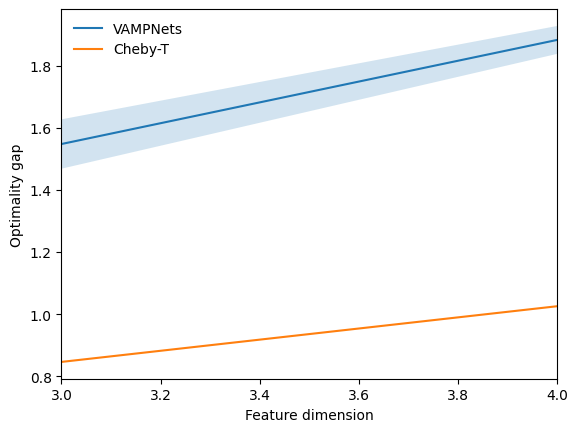

In [10]:
fig, ax = plt.subplots()
series = "feasibility-gap"
for report in reports:
    x, y, model_name = get_series(report, series)
    _, dy, _ = get_series(report, series +"_std")
    ax.plot(x, y, label=model_name)
    ax.fill_between(x, y - dy, y + dy, alpha=0.2)
ax.set_xlabel("Feature dimension")
ax.set_ylabel("Optimality gap")
ax.set_xmargin(0)
ax.legend(frameon=False)

In [7]:
def plot_eigs(reports, feature_dim):
    fig, ax = plt.subplots(figsize=(5, 5))  
    #Activate grid
    ax.grid(True, which='both')
    #Plot unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), color='k', lw=0.75)   
    for report in reports:
        feature_dims, eigs, model_name = get_eigs(report)
        feature_idx = np.where(feature_dims == feature_dim)[0][0]
        eigs = eigs[feature_idx]
        print(f"{model_name} eigenvalues: {eigs}")
        ax.scatter(eigs.real, eigs.imag, label = model_name)
    ax.scatter(logistic.eig().real, logistic.eig().imag, marker='x', color='k', label = 'True eigenvalues')
    ax.set_xlabel('Real part')
    ax.set_ylabel('Imaginary part')
    ax.legend(frameon=False, loc='lower center', bbox_to_anchor=(0, 1, 1, 0), ncol=3, fontsize=8)
    ax.set_aspect('equal')

VAMPNets eigenvalues: [[-0.28258332+0.1316823j  -0.28258332-0.1316823j   0.25584825+0.j
   0.99989132+0.j        ]
 [ 0.99958459+0.j          0.0418433 +0.17687126j  0.0418433 -0.17687126j
  -0.37667345+0.j        ]
 [ 0.99955358+0.j          0.15373002+0.j         -0.07103554+0.j
  -0.51384664+0.j        ]
 [ 0.99924649+0.j          0.03210698+0.11932186j  0.03210698-0.11932186j
  -0.35553754+0.j        ]
 [ 0.99988969+0.j          0.05076423+0.21292273j  0.05076423-0.21292273j
  -0.39135501+0.j        ]
 [ 0.99976668+0.j          0.05240401+0.15132961j  0.05240401-0.15132961j
  -0.37807048+0.j        ]
 [ 0.99821828+0.j          0.14234657+0.j         -0.28780985+0.17993944j
  -0.28780985-0.17993944j]
 [ 0.99903927+0.j          0.0941037 +0.1156756j   0.0941037 -0.1156756j
  -0.46723031+0.j        ]
 [ 0.99989037+0.j         -0.40634386+0.j          0.06284972+0.25197159j
   0.06284972-0.25197159j]
 [-0.30471037+0.16751169j -0.30471037-0.16751169j  0.26984913+0.j
   0.99967127+0.j   

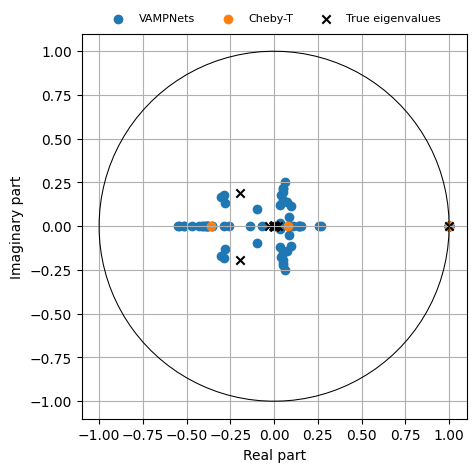

In [8]:
plot_eigs(reports, 3)